# Information content of a dynamic process

One of the major challenges is testing the utility of information theory applied to complex adaptive behavior. Can we utilize the abstraction of flow of information within a complex adaptive system to identify _how_ information traverses through the network that is coupled  to some systemic behavior. Here we are looking at meta-stability. One of the goals of the paper is how the transition between stable states occur. 

In the Ising model meta stable behavior occurs when the order parameter $T$ is below or equal to the critical temperature $T_c$. When $T < T_c$, the average phase of the spins in the system align for periods. The transition between a phase shift is at the lowest level caused through thermal noise, i.e. a node chooses its next state with some probability based on the state of its neighbors. Here, we are looking through the lense of a mechanistic description:

- How does the tipping point traverse through the system?
- What are the information properties of nodes in prior, during and after a tipping point?
    - Can the tipping point be predicted by some earlier time series by looking at the information flows within the network?


It is essential to realize that each nodes constructs an energy landscape or manifold that it is able traverse through inputs. Some points in the landscape will lead to stability whereas others are more unstable. For a node situated in a complex adaptive system, this energy landscape will vary as a function of its topological connectedness. The hope of this article will be that information theory can provide a description that identifies tipping point dynamics irregardless of a lower topological or direct energy descriptie context.

The connectedness of complex networks and the energy landscapes, gives inspiration as to what mechanism underlies the tipping point. Namely, nodes with high variability (low connectedness) will recruit nodes with lower variability (medium connectedness) and at some point convert the nodes with the lowest variability (high connected nodes). 



In [1]:


# f = lambda x, beta : 1 / (1 + np.exp(-x * beta) )
# x = np.linspace(-10, 10)
# e = f(x, 1)
# fig = go.Figure(data = go.Scatter(x = x, y = e))
# fig.show()

_Probability as a function of input energy. Around E = 0, nodes with Ising dynamic will produce more variability. For $T < T_c$ the nodes tend to magnetize. Connectivity structures in the graph will produce a variety of behaviors._

## Information dissipation time
$$ IDL = t := \alpha I(X_t ; Y_0)$$

## Asymptotic information
Need an alternative for this one



This leads to the following hypothesis:
- $H_0$: The tipping point is not initiated by nodes with high IDL, low AI.
- $H_1$: The tipping point is iniated by nodes with high IDL, low AI


# Simulation parameters

- Look at the distance to tipping point
- Create distribution P(S|M) where M is the distance to tipping point
- Start with magnetization to zero and walk the hill
- Create decreasing degree graph


In [1]:
%load_ext autoreload
%autoreload 2
from plexsim.models import *
from imi import infcy
from imi.utils import plotting
from plotly import graph_objects as go
import networkx as nx, numpy as np
from imi.utils.graph import *
from matplotlib import pyplot as plt


agp = plotting.addGraphPretty
n  = 100
gamma = 1.6
g = nx.barabasi_albert_graph(n, 4)
# g = powerlaw_graph(n, gamma)
# g = recursive_tree(4)


<ipython-input-2-7e6b1e1c3eba>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


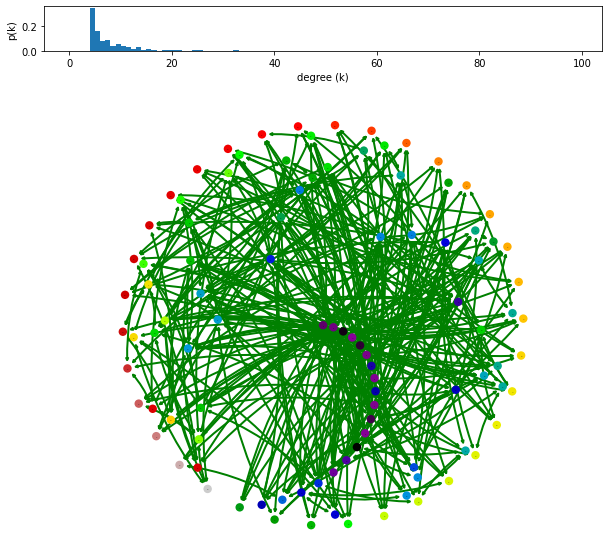

In [2]:
settings = dict(
            graph = g, 
            sampleSize = 1)
m = Potts(**settings)

cmap = plt.cm.get_cmap('nipy_spectral')
idx = np.linspace(0, 256, m.nNodes, dtype = int)
colors = cmap(idx)

fig, ax = plt.subplots(2, 1, figsize = (10, 10),
                      gridspec_kw = dict(
#                           width_ratios = [1, .5],
                                        height_ratios = [.1, 1]))
pos = plotting.get_shell_layout(m.graph, rotate = -.1)
# pos = nx.kamada_kawai_layout(m.graph)
agp(m.graph, ax[1], positions = pos, cmap = colors)

deg = dict(m.graph.degree())
ax[0].hist(list(deg.values()), np.arange(n), density = 1)
ax[0].set_xlabel('degree (k)')
ax[0].set_ylabel('p(k)')
ax[1].axis('off')
fig.show()

In [4]:
# m.adj

# import ipycytoscape
# widget = ipycytoscape.CytoscapeWidget()
# widget.set_layout(name = 'cola', padding = 10)
# widget.graph.add_graph_from_networkx(m.graph)
# display(widget)

In [53]:
temps = np.linspace(0, 10, 30); #temps[-1] = 10000
m.sampleSize = m.nNodes
out   = m.magnetize(temps, n = int(1e4))

Spawning threads
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Magnetizing temperatures


0% [##############################] 100% | ETA: 00:00:000% [########################      ] 100% | ETA: 00:00:020% [########################      ] 100% | ETA: 00:00:010% [##########################    ] 100% | ETA: 00:00:01
Total time elapsed: 00:00:09


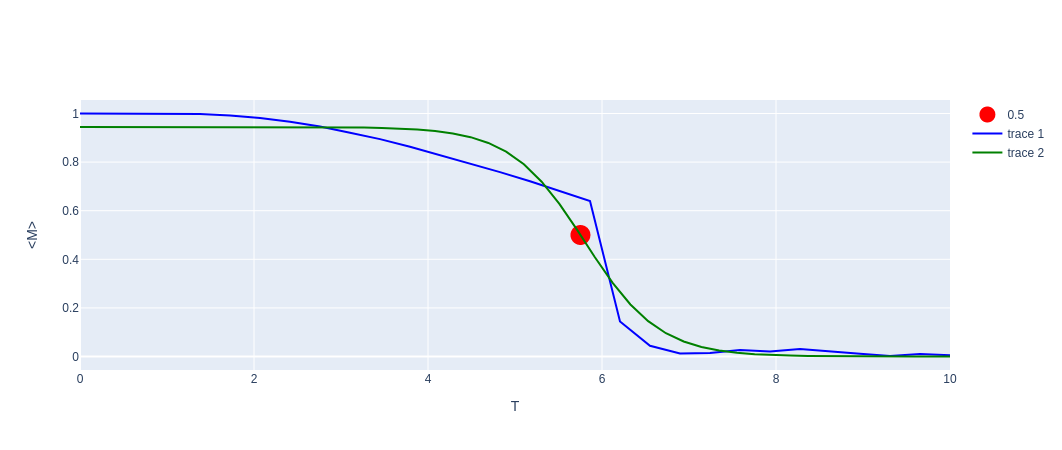

In [74]:
from scipy import optimize
def sig(x, a, b, c, d):
    return a / (1 + b * np.exp(c * (x - d)))
opts, cov = optimize.curve_fit(sig, xdata = temps, ydata = out[0],\
                      maxfev = 100_000)

thetas = [.5]

data = []

simTemps = []
# bounds = optimize.Bounds(0, np.inf)
for theta in thetas:
    res = optimize.minimize(lambda x: abs(sig(x, *opts) - theta), \
                            x0 = .2,\
#                             bounds = ((1, 0),),\
                            method = 'TNC',\
                           )
    simTemps.append(res.x) 
    line = go.Scatter(x = res.x, y = sig(res.x, *opts), \
                      mode = 'markers',\
                     marker = dict(size = 20,\
                                   color = 'red'),\
                     name = f'{theta}')
    data.append(line) 
    
xr = np.linspace(0, 10)
data.append(go.Scatter(x = temps, y = out[0], line = dict(color = 'blue')))
data.append(go.Scatter(x = xr, y = sig(xr, *opts), line = dict(color = 'green')))
fig = go.Figure(data = data)
fig.update_layout(xaxis = dict(title = 'T'),\
                 yaxis = dict(title = '<M>'))
fig.show()

# Finding the tipping points
- Simulate and use the fact that it is always bound between (0,1)
- Apply sign
- Search for diffs

In [75]:
# get a feeling for tippings points of the system
m.t = simTemps[0] * 1.
# m.t = 1.5
# m.t = 0.5
# m.mcmc.p_recomb = .0


# print(m.get_settings()['nudge'])
# for k,v in m.get_settings().items(): print(k)
# m.states = 0
# m.reset()
m.sampleSize = m.nNodes 
spacing = 1
# spacing = 1
# m.reset()

sim = m.simulate(int(2e6))

<ipython-input-76-37b27b0d372a>:39: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



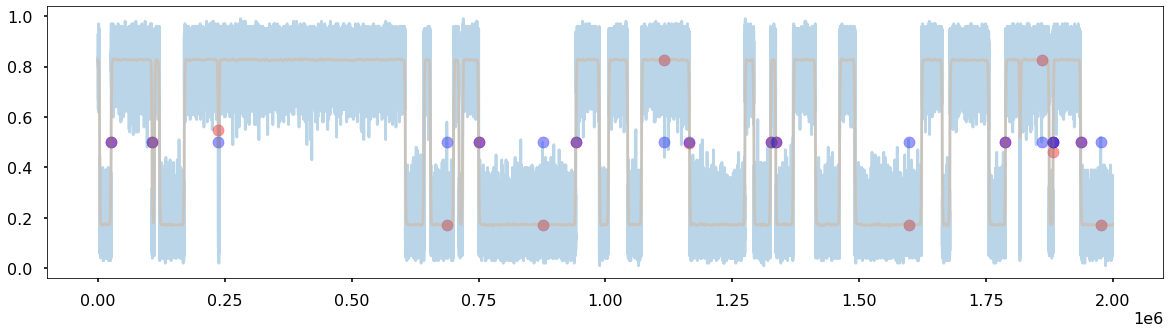

In [76]:
from scipy import ndimage, signal, fft
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.decomposition import PCA
from scipy.stats import zscore, zmap
from scipy import optimize

from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.preprocessing import quantile_transform, normalize

sigma = 1000
mean = sim.mean(1)
filtered = ndimage.gaussian_filter(mean, sigma = sigma)

d = np.sign((filtered - .5))

swaps = np.abs(np.gradient(d))
# import p
# distance = 2 * sigma #(m.nNodes - m.sampleSize + 1)
# scores = np.abs(np.gradient(np.sign(filtered * 2 - 1)))
idx = np.where(swaps)[0]

theta = .5
i = (1 / m.nNodes) * .01
# idx = np.argwhere(np.logical_and(filtered < theta + i, filtered > theta - i))
idx = np.where(np.isclose(mean, 0.5, atol = .01, rtol = 0))[0]
# print(idx)
xr = np.arange(mean.size)

fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(xr, mean, alpha  = .3)
# ax.plot(xr, swaps, alpha = .3)
# ax.plot(xr, d, alpha = .3)
ax.plot(xr, filtered, alpha = .2)
ax.scatter(xr[idx], filtered[idx], 
           color = 'red', alpha = .4)
ax.scatter(xr[idx], mean[idx], color = 'blue', 
           alpha = .4)
fig.show()

# lines=  [
#     go.Scatter(x = xr, y = mean, opacity = .3, name = "Mean magnetization"),\
#     go.Scatter(x = xr, y = swaps, opacity = .3, name = 'swaps'),
#     go.Scatter(x = xr, y = filtered, opacity = .3, name = 'filtered'),
#     go.Scatter(x = xr[idx], y = mean[idx], mode = 'markers')
# #     go.Scatter(y = sim[:, 0], opacity = .25, name = 'Hub'),\
# #     go.Scatter(y = sim[:, 1:5].mean(1), opacity = .1)
# ]
# fig = go.Figure(data = lines)
# fig.update_layout(xaxis = dict(title = 'time'), )
# fig.show()

In [9]:
# 1/ m.nNodes

In [78]:
from scipy import ndimage
from imi.utils.signal import find_peaks, find_peaks_single, running
# m.t = 1o

from plexsim.models import *
from pyprind import prog_bar
# from imi.utils.graph import recursive_tree
# g = recursive_tree(4)
# m = Potts(g, t = 3)
def gen_symmetric(bins):
    return np.asarray([*-bins[::-1], *bins])
bins = gen_symmetric(np.linspace(0.05, 1, 30))


m.sampleSize = 1 # m.nNodes

m.sampleSize = m.nNodes
snaps, cond   = running(m, 10, int(1e5), window = 100)
px, mi = infcy.mutualInformation(cond, snaps)

# dist = find_peaks_dumb(m, int(1e6),
#                       bins = bins)


0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:30


(array([17., 18.,  4., 12.,  9.,  6., 16.,  8., 10.,  5.]),
 array([0.45 , 0.459, 0.468, 0.477, 0.486, 0.495, 0.504, 0.513, 0.522,
        0.531, 0.54 ]),
 <BarContainer object of 10 artists>)

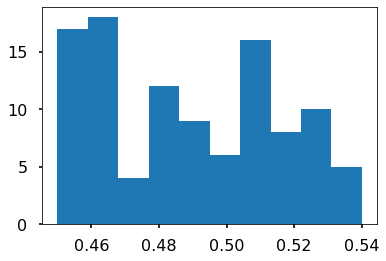

In [79]:
d = np.array([np.mean(k) for k in snaps])
fig, ax = plt.subplots()
ax.hist(d)

<ipython-input-83-34dd58fc6ebe>:34: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



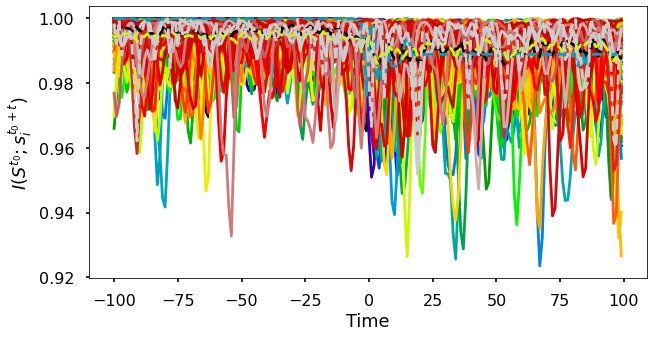

In [83]:
from imi.utils.plotting import get_linear_cmap
%matplotlib inline

px, mi = infcy.mutualInformation(cond, snaps)
fig, ax = plt.subplots(figsize = (10, 5))
colors = get_linear_cmap(m.nNodes)
target, deg = max(dict(m.graph.degree()).items(), key = lambda x : x[1])

paths = {}
for node in m.graph.nodes():
    try:
        l = nx.shortest_path_length(m.graph, node, target)
    except:
        l = -1
    paths[l] = paths.get(l, []) + [m.adj.mapping[node]]

for node, idx in m.adj.mapping.items():
    tmp = mi[:, idx]
    tmp = ndimage.gaussian_filter(mi[:, idx], sigma=1)
    xr = np.arange(-tmp.size // 2, tmp.size//2)
    ax.plot(xr, tmp, color = colors[idx], label = node)

colors = get_linear_cmap(len(paths))
for c, (k, v) in zip(colors, paths.items()):
    xr = np.arange(-mi.shape[0] // 2, mi.shape[0] // 2)
    ax.errorbar(xr, mi[:, v].mean(1), yerr = 0 * np.std(mi[:,v], 1), 
                color = c, linestyle = 'dashed', label = k)
# ax.legend()
# ax.set_xscale('log')
# ax.legend(bbox_to_anchor = (1, 1))
ax.set_xlabel("Time")
inf = "$I(S^{t_0}; s_i^{t_0 + t})$"
ax.set_ylabel(inf)
fig.show()

In [ ]:
assert 0

In [ ]:
# assert 0 
# d = np.asarray([i for i in dist[0].keys()]).mean(1)
# fig, ax = plt.subplots()
# bins = np.linspace(0, 1)
# ax.hist(d, bins, density = 1)
# fig.show()


        

In [16]:
degs = {}
for node, d in m.graph.degree():
    degs[d] = degs.get(d, []) + [m.adj.mapping[node]]
for k, v in degs.items():
    print(k)
    
# r = {}



45
20
9
4
5
3
2
1


NameError: name 'dist' is not defined

# Conditional sampling around a tipping point

In [92]:
surround = 10
start    = 1
sigma    = 1000

dist = find_peaks_single(m, 
                  1, 
                  buffer_size = int(1e5), \
                  bins        = bins,\
                  surround    = surround, \
                  start       = start,
                  sigma       = sigma,
                  reset       = False,
#                   target      = 0,
                 )

0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


-1.0 0	-0.97 0	-0.93 0	-0.9 0	-0.87 0	-0.84 0	-0.8 0	-0.77 0	-0.74 0	-0.71 0	-0.67 0	-0.64 0	-0.61 0	-0.57 0	-0.54 0	-0.51 0	-0.48 7	-0.44 65	-0.41 285	-0.38 776	-0.34 1121	-0.31 1343	-0.28 1557	-0.25 794	-0.21 429	-0.18 217	-0.15 78	-0.12 13	-0.08 2	-0.05 3	0 9	0.05 1	0.08 2	0.12 6	0.15 18	0.18 53	0.21 121	0.25 310	0.28 572	0.31 1057	0.34 990	0.38 859	0.41 631	0.44 182	0.48 46	0.51 7	0.54 0	0.57 0	0.61 0	0.64 0	0.67 0	0.71 0	0.74 0	0.77 0	0.8 0	0.84 0	0.87 0	0.9 0	0.93 0	0.97 0	1.0 0	

<ipython-input-93-b62758a97a9d>:7: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



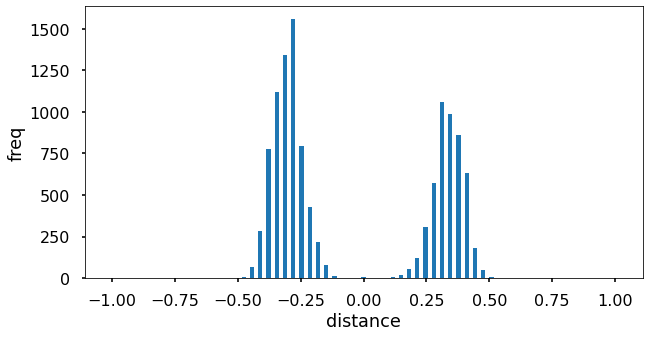

In [93]:
fig, ax = plt.subplots(figsize = (10, 5))
xr = np.arange(len(dist))
height = np.asarray([len(i) for i in dist.values()])

ax.bar(dist.keys(), height, width = 1/(len(dist)))
ax.set(ylabel = "freq", xlabel = "distance")
fig.show()

for k, v in dist.items():
    print(round(k,2), len(v), end = '\t')

# Show MI decays as function of distance to target 

In [94]:
%%capture
from imi import infcy
np.seterr('ignore')
from pyprind import prog_bar
# m.p_recomb = .0
# m.sampleSize = m.nNodes # warning
m.sampleSize = 1 # m.nNodes
SIM = infcy.Simulator(m)
mis = {}
for k, v in prog_bar(dist.items()):
    try:
        output = SIM.forward(v, repeats = int(5e2), time_steps = 500)
        snapshots, conditional = output.values()
        px, mi = infcy.mutualInformation(conditional, snapshots)
        mis[k] = mi
    #         mis.append(mi)
    except Exception as e:
        print(e)
        continue

<ipython-input-95-6dcbf521dbf2>:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



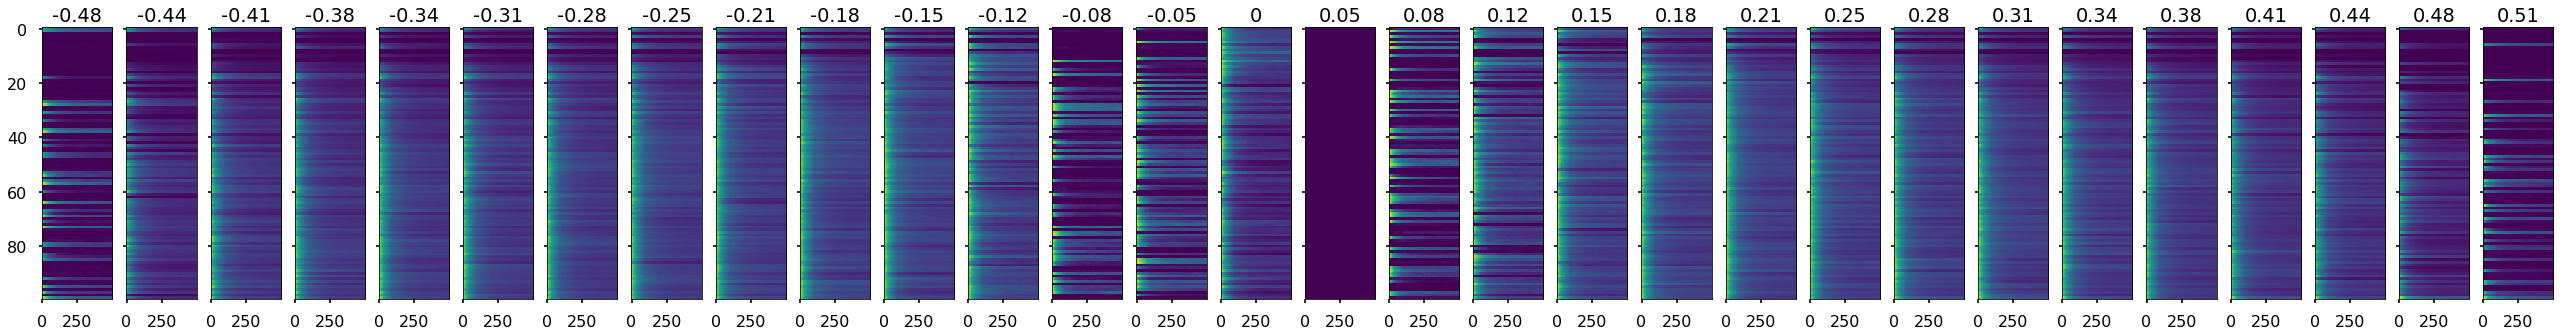

In [95]:
traces = []
titles = [f'$distance {{ {idx} }}$' for idx in dist]
from plotly.subplots import make_subplots
# print(len(mis))
# print(mis)

labels = [round(float(i), 2) for i in mis.keys()]
fig, ax = plt.subplots(1, len(mis), sharex = 'all',
                      sharey = 'all',
                      figsize = (45, 5))

for idx, (axi, (k, mi)) in enumerate(zip(ax.flat, mis.items())):
#     z = (mi - mi.min()) / (mi.max() - mi.min())
    axi.imshow(mi.T, aspect = 'auto', interpolation = 'none')
    axi.set_title(round(k, 2))
    
fig.show()

# Show results in the network

3 10


<ipython-input-96-f66789184dec>:47: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



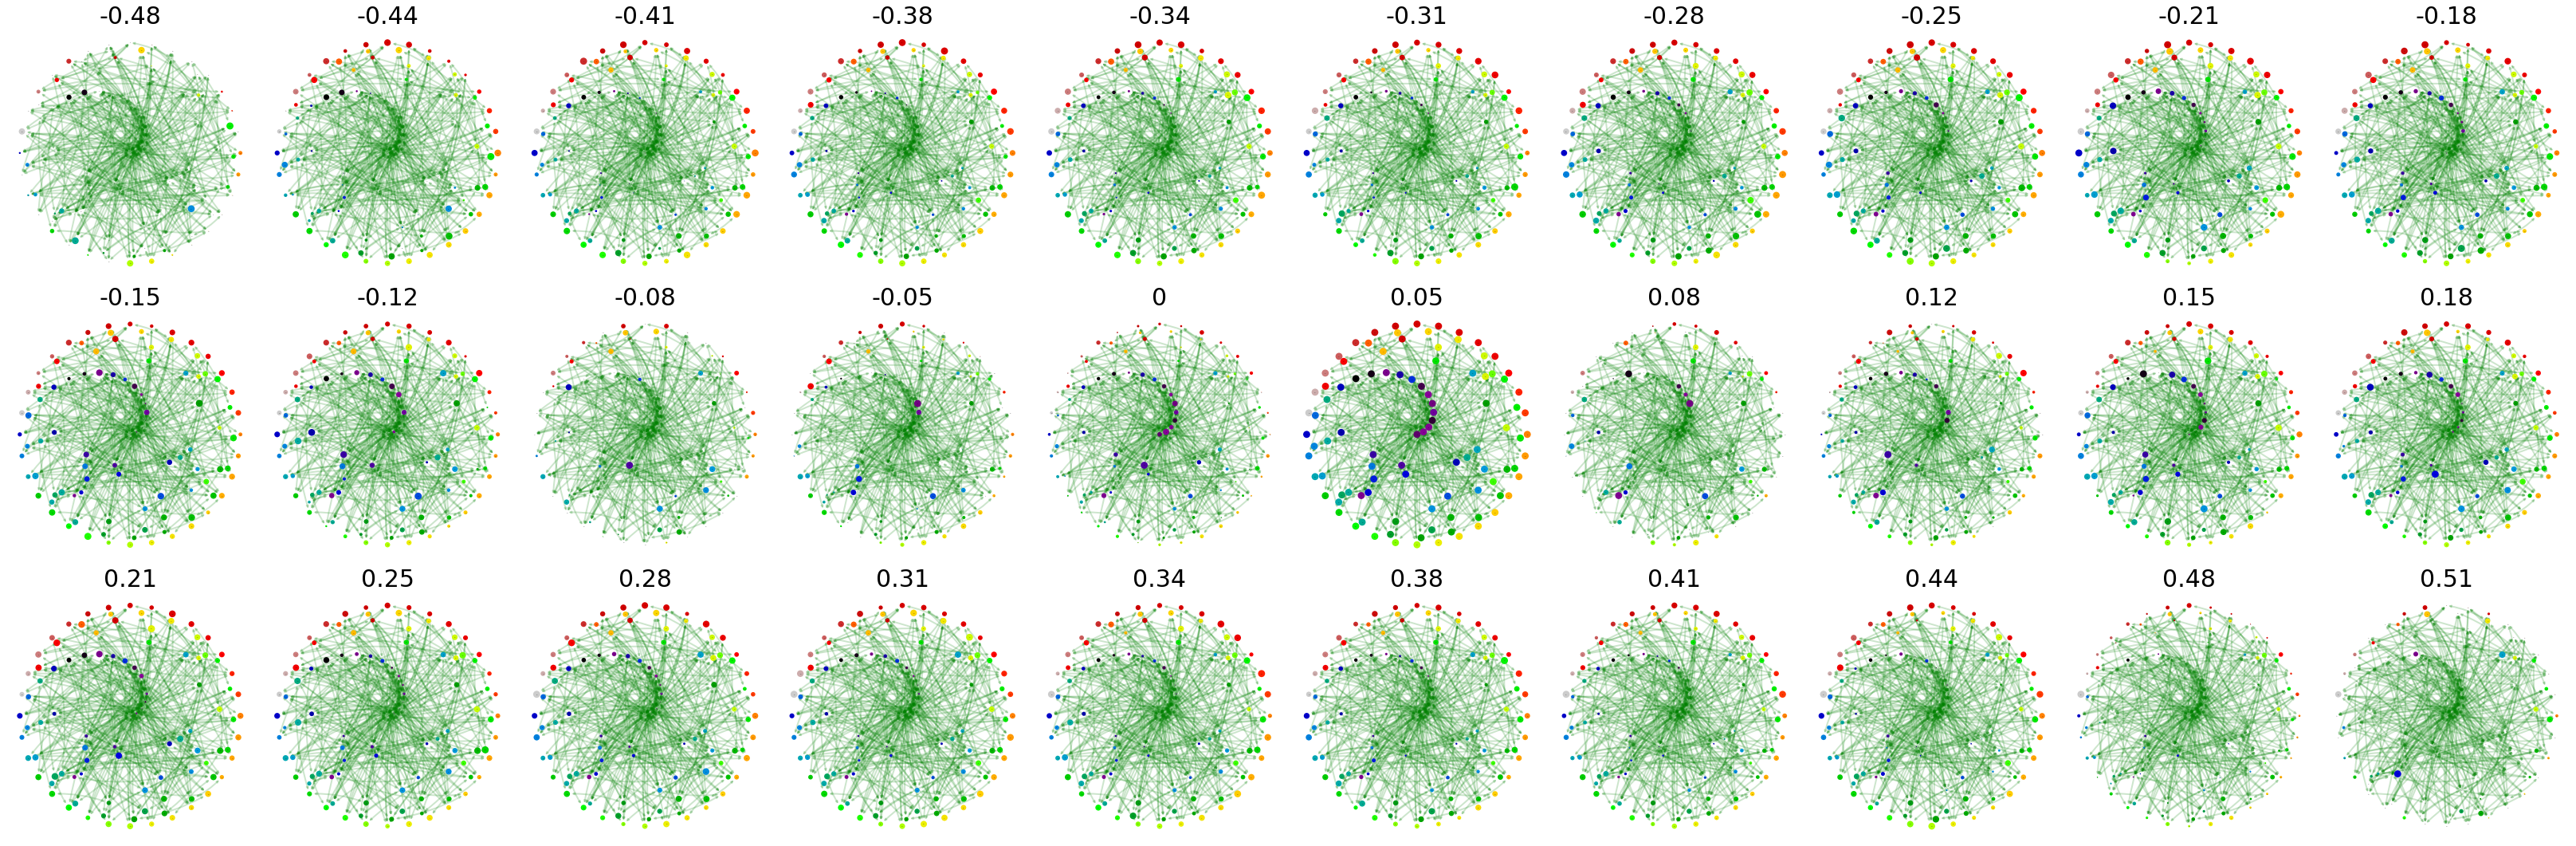

In [96]:
# from matplotlib import pyplot as plt
from imi.utils.plotting import addGraphPretty as agp, get_shell_layout
c = len(mis) // 3
r = 3
print(r, c)
%matplotlib inline
fig, ax = plt.subplots(r, c, figsize = (45, 15))

# 
def get_distance_shells(graph):
    distances = {}
    target, deg = max(graph.degree())
    for node in graph.nodes():
        try:
            l = nx.shortest_path_length(graph, target, node)
        # no path
        except:
            l = np.inf
        distances[l] = distances.get(l, []) + [node]
    distances = dict(sorted(distances.items(), key = lambda x: x[0])) 
    return distances 

# pos = get_distance_shells(m.graph)
pos = get_shell_layout(m.graph)
# pos = nx.shell_layout(m.graph, nlist =tmp list(pos.values()))
mis = dict(sorted(mis.items(), key = lambda x: x[0]))
colors = get_linear_cmap(m.nNodes)
for axi, (k, mi) in zip(ax.flatten(), mis.items()):
    patches = agp(m.graph, 
                  axi, 
                  positions = pos, 
                  mapping   = m.adj.mapping,\
                  cmap      = colors).patches
    radius = mi.sum(0)
    radius = (radius - radius.min()) / (radius.max() - radius.min())
    radius[np.isnan(radius) == True] = 1
    for patch in patches:
        if label := patch.get_label():
                idx = m.adj.mapping[label]
                patch.set(radius = radius[idx] * .03)
        else:
            patch.set(alpha = .2)
    axi.set_title(round(k, 2), fontsize = 30)
    axi.axis('off')
fig.subplots_adjust(wspace = 0, hspace = 0)
fig.tight_layout()
fig.show()

In [97]:
# m.adj.mapping
# nx.flow_hierarchy(m.graph)
# get_distance_shells(m.graph).keys()

# Estimate AI, IDT

In [98]:
from scipy import optimize
from scipy import integrate
def f(x, a, b, c, d, e, f, g):
    return a + b * np.exp(-c * (x - d)) + e * np.exp(-f * (x - g))

# def f(x, a, b, c):
#     return a + b * np.exp(- c * x)
xr = np.arange(len(next(iter(mis.values()))))

padding = np.zeros(1)
# xr = np.insert(xr, -1, np.arange(int(1e5), int(1e5) + padding.size))
coeffs = np.zeros((len(mis), m.nNodes, f.__code__.co_argcount - 1))

features = np.zeros((len(mis), m.nNodes, 3))

start = int(1e6)
xr_extend = np.arange(start, start + padding.size)
from pyprind import prog_bar
for idx, (k,mi) in enumerate(prog_bar(mis.items())):
#     mi = (mi - mi.min()) / (mi.max() - mi.min())
    for jdx, node in enumerate(mi.T):
        xre  = np.concatenate( (xr, xr_extend), axis = 0)
        nodee = np.concatenate( (node, padding) )
        a, b = optimize.curve_fit(f, xre, nodee, 
                                  maxfev = int(1e5), 
                                  bounds = (0, np.inf))
        coeffs[idx, jdx] = a
        try:
            idt = optimize.minimize(lambda x: abs(f(x, *a) - .5 * (f(0, *a) - a[0]) - a[0]), 0,\
                                method = 'COBYLA',\
#                                 bounds = (0, np.inf),\
                                options = dict(maxiter = int(1e5)))
            idt_ = idt.x
        except:
            idt_ = 0
        ai       = a[0]
        imi   = integrate.quad(lambda x: f(x, *a), 0, np.inf, full_output = 1)
        imi = imi[0]
        features[idx, jdx] = (ai, idt_, imi)


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:52


<ipython-input-99-7e18bbd16fa0>:32: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



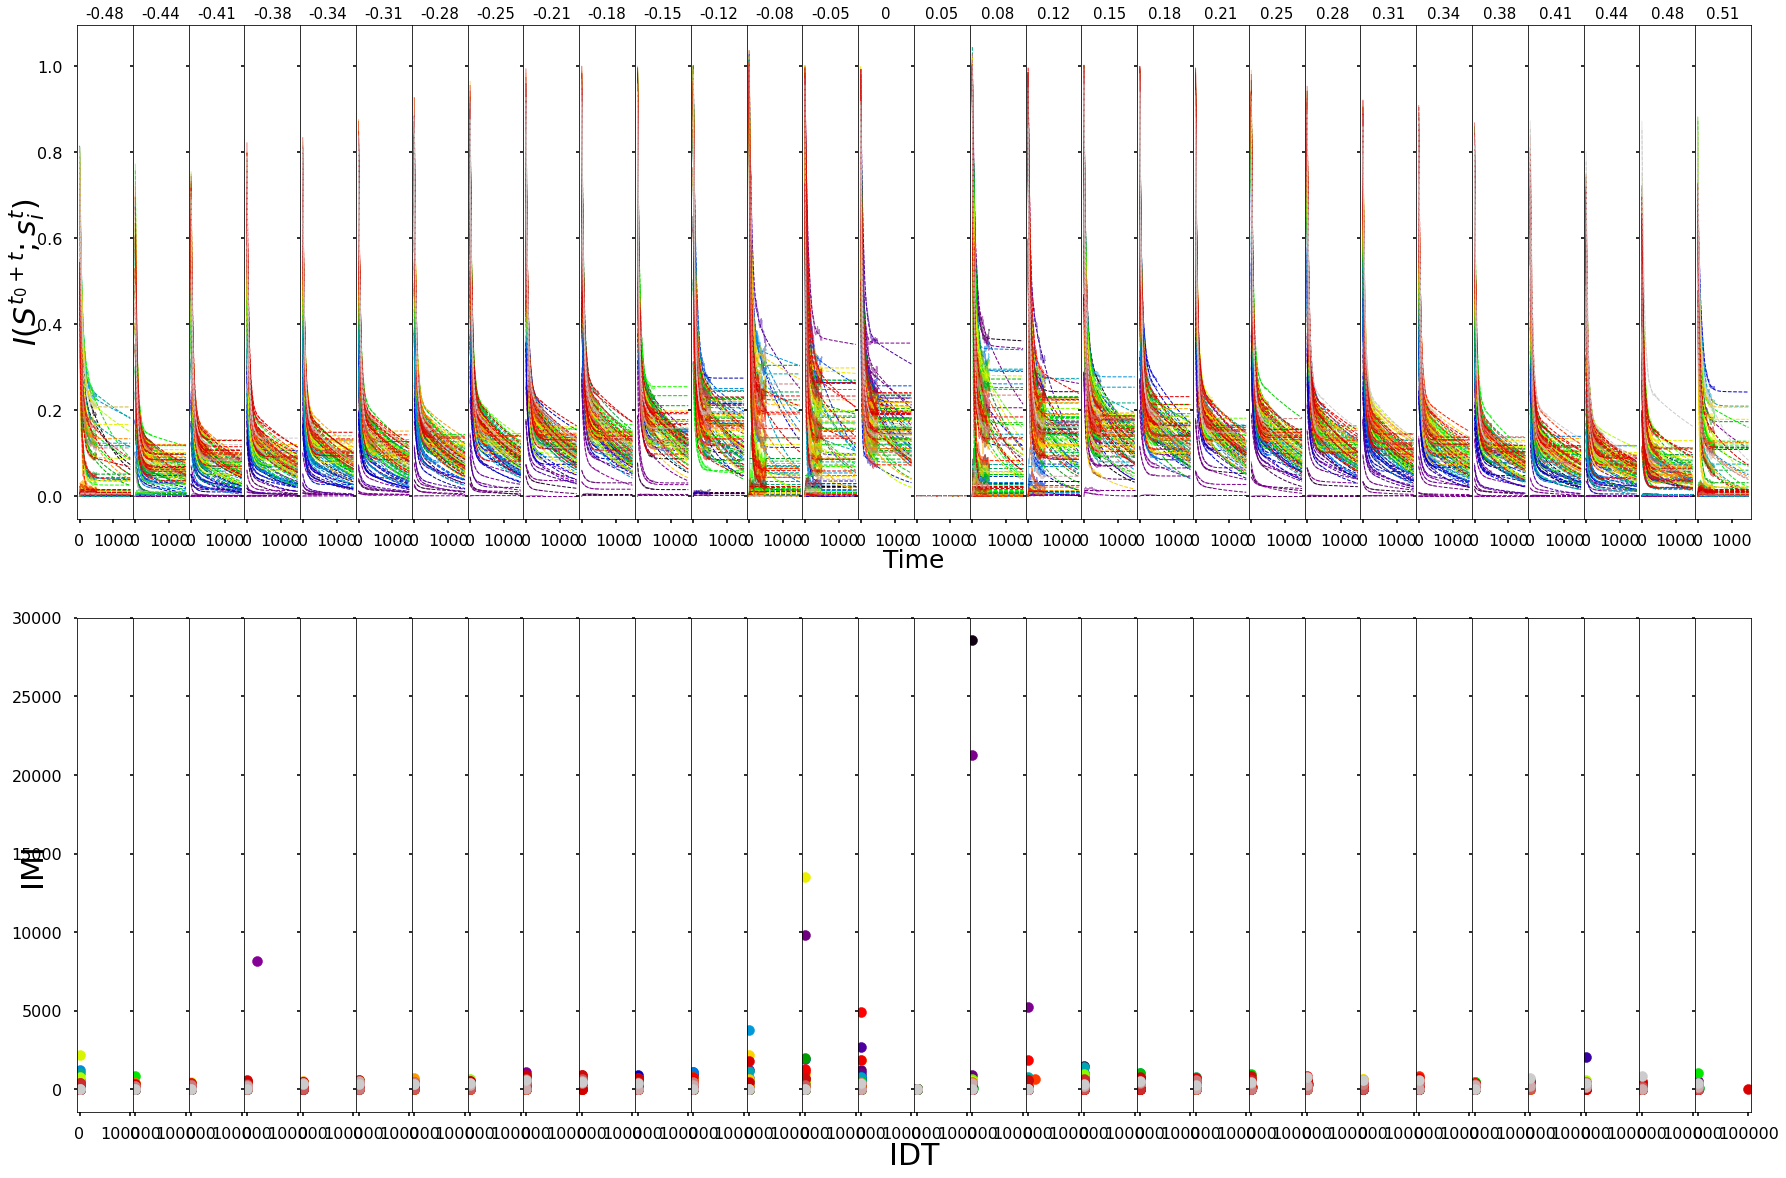

In [99]:
fig, ax = plt.subplots(2, len(mis), figsize = (30, 20),\
                       sharex = 'row',\
                       sharey = 'row'
                      )
# mapping = {int(i): j for i, j in m.adj.mapping.items()}
colors = get_linear_cmap(m.nNodes)
for idx, (axi, (k, mi)) in enumerate(zip(ax[0].flatten(), mis.items())):
    for jdx, (c, node) in enumerate(zip(colors, mi.T)):
        
        xr = np.linspace(0, node.size * 3)
        axi.plot(node, color = c, alpha = .5, linewidth = 1)
#         axi.set_xlim(-3, 40)
        axi.plot(xr, f(xr, *coeffs[idx, jdx]), color = c, 
                 linestyle = 'dashed', linewidth = 1)
        
        ax[1, idx].scatter(x = features[idx, jdx, 1] + 1e-16, 
                           y = features[idx, jdx, 2] + 1e-16,\
                           color = c, s = 100)
#         ax[1, idx].set_yscale('log')
#         ax[1, idx].set_xscale("log")
    axi.set_title(round(k, 2), fontsize = 15)
ma = fig.add_subplot(211, xticks = [], yticks = [],\
               frameon = False)
ma.set_xlabel('Time',labelpad = 30, fontsize = 25)
ma.set_ylabel('$I(S^{t_0 + t}; s_i^t)$', labelpad = 30, fontsize = 30)

ma = fig.add_subplot(212, xticks = [], yticks = [],\
               frameon = False)
ma.set_xlabel('IDT', labelpad = 30, fontsize = 30)
ma.set_ylabel('IMI', labelpad = 30, fontsize = 30)
fig.subplots_adjust(wspace = 0)
fig.show()

In [ ]:
paths = {}

target, deg = max(dict(m.graph.degree()).items(), key = lambda x : x[1])
for node in m.graph.nodes():
    try:
        l = nx.shortest_path_length(m.graph, node, target)
    except:
        l = -1
    paths[l] = paths.get(l, []) + [m.adj.mapping[node]]
# print(paths) 
lm = plotting.get_linear_cmap(len(paths))
fig, ax = plt.subplots(2, len(mis), figsize = (20, 10),\
                       sharex = 'row',\
                       sharey = 'row'
                      )
xr = np.linspace(0, 10)

# d = (features - features.min(1)[:, None]) / (features.max(1)[:, None] - features.min(1)[:, None])
# d = (features - features.min(0)[None]) / (features.max(0)[None] - features.min(0)[None])
for idx, (axi, (k, mi)) in enumerate(zip(ax[0].flatten(), mis.items())):
#     mi = (mi - mi.min()) / (mi.max() - mi.min())
    for jdx, (c, (l, nodes)) in enumerate(zip(lm, paths.items())):
        axi.plot(mi[:, nodes].mean(1), color = c, label = l)
        
#         fe = d[idx, nodes].mean(0)
#         ax[1, idx].scatter(x = fe[1]+ 1e-16, 
#                            y = fe[2] + 1e-16,\
#                            color = c, s = 100)
        
#         ax[1, idx].set_yscale('log')
#         ax[1, idx].set_xscale("log")
    axi.set_title(round(k, 2))
axi.legend()
ma = fig.add_subplot(211, xticks = [], yticks = [],\
               frameon = False)
ma.set_xlabel('Time',labelpad = 30, fontsize = 25)
ma.set_ylabel('$I(S^{t_0 + t}; s_i^t)$', labelpad = 30, fontsize = 30)

ma = fig.add_subplot(212, xticks = [], yticks = [],\
               frameon = False)
ma.set_xlabel('$\phi_0$', labelpad = 30, fontsize = 30)
ma.set_ylabel('$\phi_1$', labelpad = 30, fontsize = 30)
fig.subplots_adjust(wspace = 0)
fig.show()

In [ ]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# mi = mis[0]
# x = np.arange(len(mi))[:, None]
# y = mi[:, [0]]
# print(y.shape)
# print(x.shape)
# gp.fit(x, y.flat)

In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(x, mi[:, 0])
# ax.plot(x, gp.predict(x))